<a href="https://colab.research.google.com/github/AKVITA380/Deep-Learning-6-July-2024/blob/main/Regression_Keras_Practical_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ignore warnings

In [41]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1 read dataset

In [42]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df1 =pd.read_csv(url)
df1.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


step 2 check basic data quality

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [47]:
df1.duplicated().sum()

41

In [46]:
df1.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [44]:
df1.duplicated().sum()/len(df)

0.004285117056856187

In [45]:
df1.drop_duplicates(keep='first')
df1

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


step 3 seperate X AND Y

In [48]:
X=df1.drop(columns=['PE'])
Y=df1['PE']

In [49]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [50]:
Y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

step 4 Preprocess X using pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [55]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [56]:
X_pre= num_pipe.fit_transform(X)

In [57]:
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


apply Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [59]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [60]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [61]:
ytrain.head()

5487    442.75
3522    432.52
6916    428.80
7544    426.07
7600    436.58
Name: PE, dtype: float64

In [63]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [64]:
ytest.head()

2513    433.27
9411    438.16
8745    458.42
9085    480.82
4950    441.41
Name: PE, dtype: float64

In [65]:
from keras.models import Sequential
from keras.layers import Dense,Input

Intialize the model


In [66]:
model=Sequential()

Add Input Layer

In [67]:
model.add(Input(shape=(xtrain.shape[1])))

#Add Dense Hidden Layer 1


In [68]:

model.add(Dense(16,activation='relu'))

Add Hidden Layer 2

In [69]:
model.add(Dense(8,activation='relu'))

Add Output Layer

In [70]:
model.add(Dense(1,activation='linear'))

Compile Model

In [71]:
model.compile(loss="mse", metrics=["mae"],optimizer="adam")

In [72]:
hist1 = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=60)

Epoch 1/60
240/240 [==============================] - 2s 4ms/step - loss: 201400.5469 - mae: 448.3728 - val_loss: 189570.0938 - val_mae: 434.9534
Epoch 2/60
240/240 [==============================] - 1s 4ms/step - loss: 153304.0625 - mae: 388.9510 - val_loss: 103359.8828 - val_mae: 318.4290
Epoch 3/60
240/240 [==============================] - 1s 3ms/step - loss: 56467.1875 - mae: 218.7960 - val_loss: 25159.2949 - val_mae: 135.5787
Epoch 4/60
240/240 [==============================] - 1s 4ms/step - loss: 17726.5410 - mae: 111.7496 - val_loss: 13755.4111 - val_mae: 99.0651
Epoch 5/60
240/240 [==============================] - 1s 4ms/step - loss: 11606.6865 - mae: 90.9498 - val_loss: 9333.7744 - val_mae: 81.8131
Epoch 6/60
240/240 [==============================] - 1s 4ms/step - loss: 7645.4717 - mae: 73.8215 - val_loss: 5937.8130 - val_mae: 65.1101
Epoch 7/60
240/240 [==============================] - 1s 4ms/step - loss: 4718.5010 - mae: 57.7572 - val_loss: 3600.0378 - val_mae: 50.3839


In [73]:
hist.history["loss"]

[19.964107513427734,
 19.80665397644043,
 19.75072479248047,
 19.70454978942871,
 19.71487045288086,
 19.783512115478516,
 19.683860778808594,
 19.619279861450195,
 19.826095581054688,
 19.594913482666016,
 19.576326370239258,
 19.613908767700195,
 19.61134147644043,
 19.692352294921875,
 19.68006706237793,
 19.4130916595459,
 19.693357467651367,
 19.779541015625,
 19.679420471191406,
 19.467880249023438,
 19.585195541381836,
 19.557493209838867,
 19.714746475219727,
 19.62919044494629,
 19.514127731323242,
 19.611238479614258,
 19.52093505859375,
 19.590696334838867,
 19.565906524658203,
 19.39832305908203,
 19.652677536010742,
 19.480667114257812,
 19.533794403076172,
 19.537452697753906,
 19.571979522705078,
 19.4238338470459,
 19.683198928833008,
 19.54241943359375,
 19.457374572753906,
 19.59034538269043,
 19.583364486694336,
 19.397769927978516,
 19.388750076293945,
 19.42615509033203,
 19.411941528320312,
 19.535093307495117,
 19.562570571899414,
 19.44969367980957,
 19.51344490

In [74]:
hist.history['val_loss']

[18.375925064086914,
 18.14691925048828,
 18.348318099975586,
 18.868648529052734,
 18.860502243041992,
 19.006916046142578,
 18.328426361083984,
 18.843358993530273,
 17.96092987060547,
 18.484386444091797,
 17.963462829589844,
 17.887428283691406,
 17.974679946899414,
 19.112018585205078,
 17.95403480529785,
 17.812854766845703,
 17.858936309814453,
 17.967782974243164,
 18.021379470825195,
 18.43902587890625,
 18.061073303222656,
 17.910306930541992,
 18.734737396240234,
 18.204483032226562,
 17.699995040893555,
 17.812698364257812,
 17.81528091430664,
 18.243213653564453,
 17.887842178344727,
 17.614532470703125,
 17.789220809936523,
 18.40418243408203,
 17.895511627197266,
 17.707530975341797,
 18.483394622802734,
 18.51704216003418,
 17.58138084411621,
 17.71589469909668,
 17.67264175415039,
 18.560049057006836,
 18.7941951751709,
 17.6108341217041,
 18.516868591308594,
 17.82737922668457,
 17.783058166503906,
 17.598726272583008,
 18.190153121948242,
 17.572235107421875,
 18.334

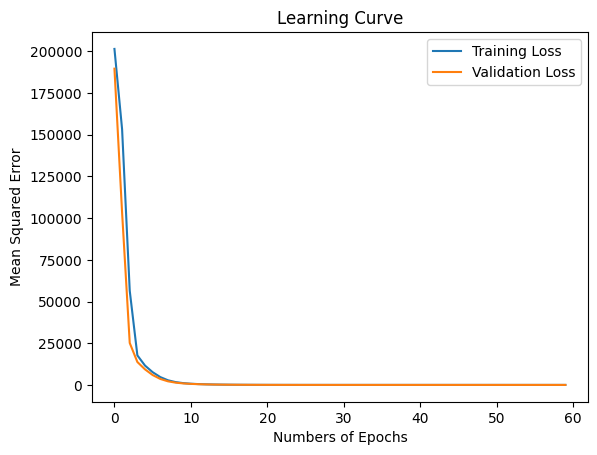

In [75]:
import matplotlib.pyplot as plt
plt.plot(hist1.history["loss"],label="Training Loss")
plt.plot(hist1.history["val_loss"],label="Validation Loss")
plt.xlabel("Numbers of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [78]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 2ms/step - loss: 18.4032 - mae: 3.3881


[18.403167724609375, 3.3880577087402344]

In [77]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 3ms/step - loss: 19.6439 - mae: 3.4573


[19.64394187927246, 3.457334518432617]

Predict the results for train and test

In [79]:
ypred_train=model.predict(xtrain)
ypred_test=model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [80]:
ypred_train[0:5]

array([[440.95532],
       [434.4852 ],
       [434.54196],
       [431.626  ],
       [432.9802 ]], dtype=float32)

In [81]:
ytrain.head()

5487    442.75
3522    432.52
6916    428.80
7544    426.07
7600    436.58
Name: PE, dtype: float64

In [82]:
ypred_test[0:5]

array([[434.88144],
       [435.9183 ],
       [461.725  ],
       [477.23166],
       [434.01535]], dtype=float32)

In [83]:
ytest.head()

2513    433.27
9411    438.16
8745    458.42
9085    480.82
4950    441.41
Name: PE, dtype: float64


# R2 score in train

In [84]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)


0.9328462456424744

In [85]:
# R2 score in test
r2_score(ytest, ypred_test)

0.935685676279695

Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [86]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [87]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [88]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380936,0.355246,-0.594274,0.813796
1,1.238415,0.045974,-1.027045,-1.829444
2,1.105566,1.487673,-2.010463,0.861058
3,0.810346,0.625958,-0.316424,0.052812
4,-1.005253,-1.062057,2.110125,-0.160209


In [89]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[445.37418],
       [438.68362],
       [432.14865],
       [439.5034 ],
       [474.10867]], dtype=float32)

In [90]:
xnew["PowerOutput_pred"] = preds

In [91]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.374176
1,28.88,54.89,1007.16,46.60,438.683624
2,27.89,73.21,1001.32,85.88,432.148651
3,25.69,62.26,1011.38,74.08,439.503387
4,12.16,40.81,1025.79,70.97,474.108673
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.162994
96,11.78,39.96,1011.37,82.95,472.667480
97,5.62,41.38,1020.91,86.21,484.503998
98,24.96,74.99,1008.25,80.52,436.129974


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

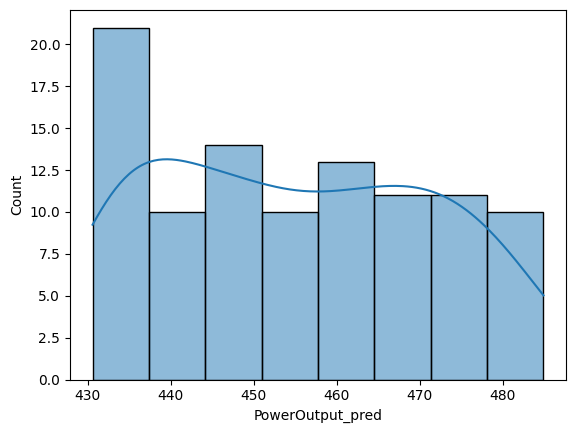

In [92]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)